## Drug Classification

#### About Dataset


* Age: Numeric input field.
* Sex: Radio buttons for 'F' and 'M'.
* Blood Pressure (BP): Dropdown menu with options for 'HIGH', 'LOW', and 'NORMAL'.
* Cholesterol: Dropdown menu with options for 'HIGH', 'LOW', and 'NORMAL'.
* Na_to_K: Numeric input field for the Sodium-to-Potassium ratio.



#### Import Libraries

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [9]:
df=pd.read_csv('drug200.csv')

In [10]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


 #### Exploratory Data Analysis

In [11]:
df.shape

(200, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,200.0,NaN,NaN,NaN,44.315,16.544315,15.0,31.0,45.0,58.0,74.0
Sex,200,2,M,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BP,200,3,HIGH,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol,200,2,HIGH,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Na_to_K,200.0,NaN,NaN,NaN,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247
Drug,200,5,DrugY,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [15]:
for i in df.columns:
    print(i,':',df[i].nunique())

Age : 57
Sex : 2
BP : 3
Cholesterol : 2
Na_to_K : 198
Drug : 5


In [18]:
df.duplicated() #duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

<Axes: title={'center': 'Gender Distribution'}, xlabel='Sex', ylabel='count'>

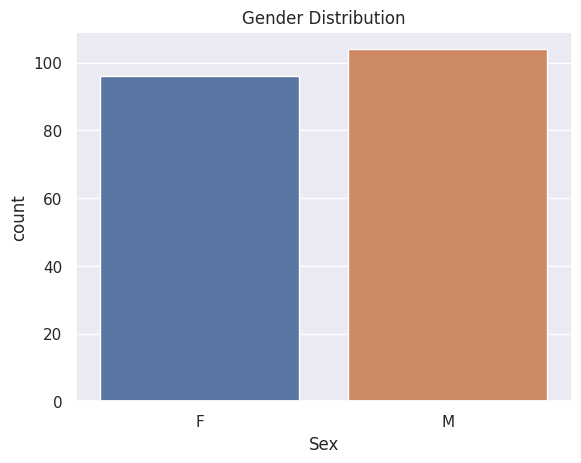

In [23]:
plt.title('Gender Distribution')
sns.countplot(data=df,x='Sex')

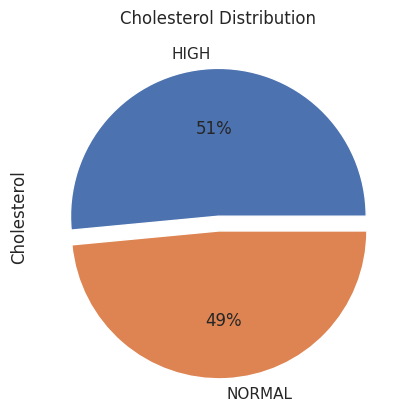

In [25]:
plt.title('Cholesterol Distribution')
df['Cholesterol'].value_counts().plot(kind='pie',explode=(0,0.1),autopct="%.0f%%")
plt.show()

[]

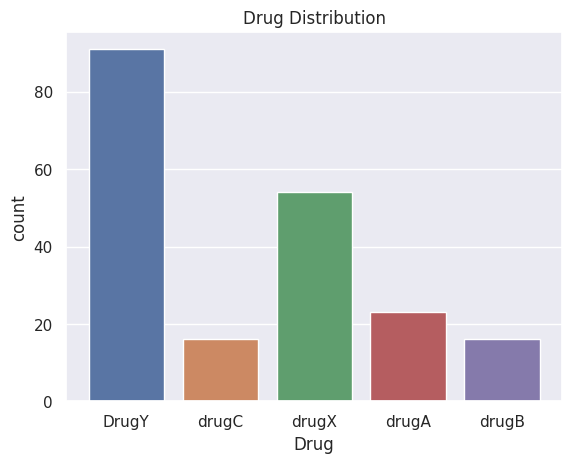

In [26]:
plt.title('Drug Distribution')
sns.countplot(data=df,x='Drug')
plt.plot()

 Here we can see that the distributions of target variable "drug" is really imbalanced

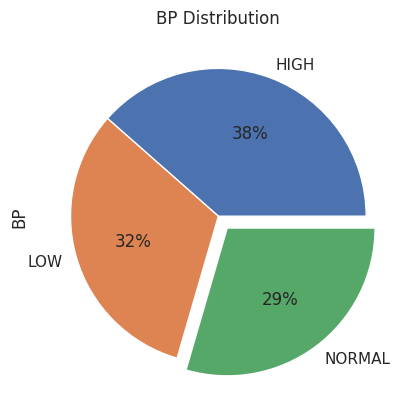

In [27]:
plt.title('BP Distribution')
df['BP'].value_counts().plot(kind='pie',explode=(0,0,0.1),autopct="%.0f%%")
plt.show()

<Axes: xlabel='Na_to_K', ylabel='Density'>

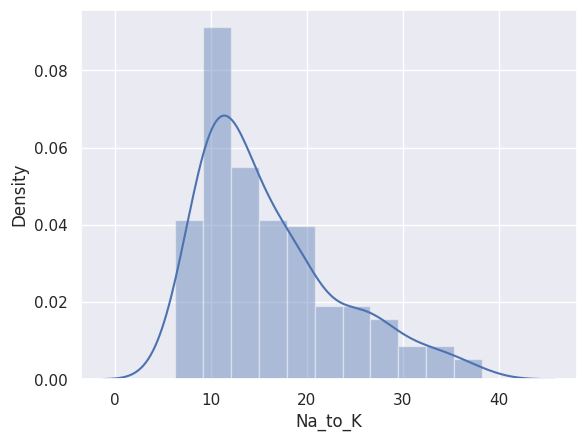

In [30]:
sns.distplot(df['Na_to_K'],kde=True)

<Axes: xlabel='Age', ylabel='Count'>

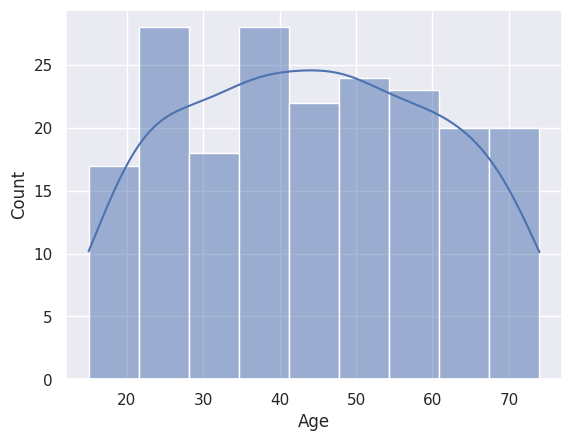

In [29]:
sns.histplot(df['Age'],kde=True)

[]

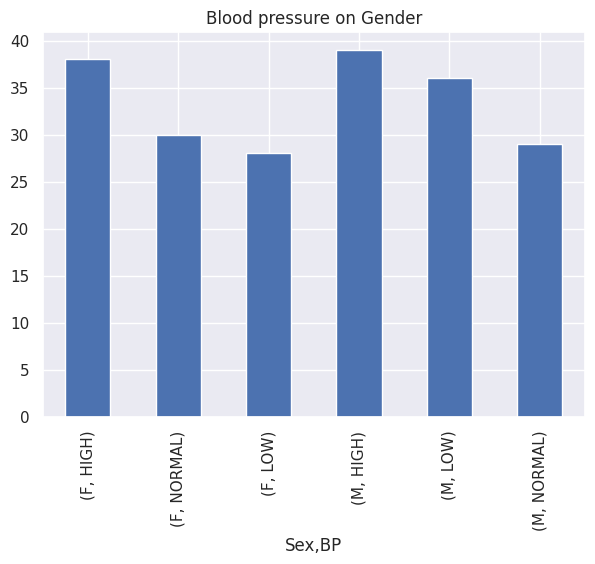

In [42]:
df.groupby(['Sex'])['BP'].value_counts().plot(kind="bar",figsize=(7,5))
plt.title('Blood pressure on Gender')
plt.plot()

[]

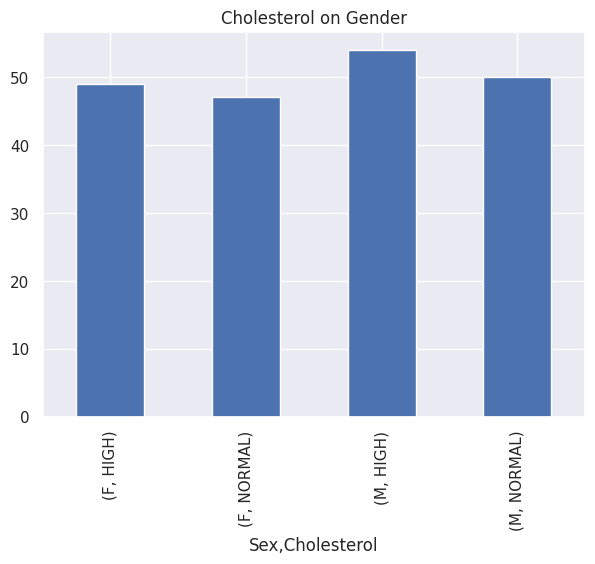

In [43]:
df.groupby(['Sex'])['Cholesterol'].value_counts().plot(kind="bar",figsize=(7,5))
plt.title('Cholesterol on Gender')
plt.plot()

[]

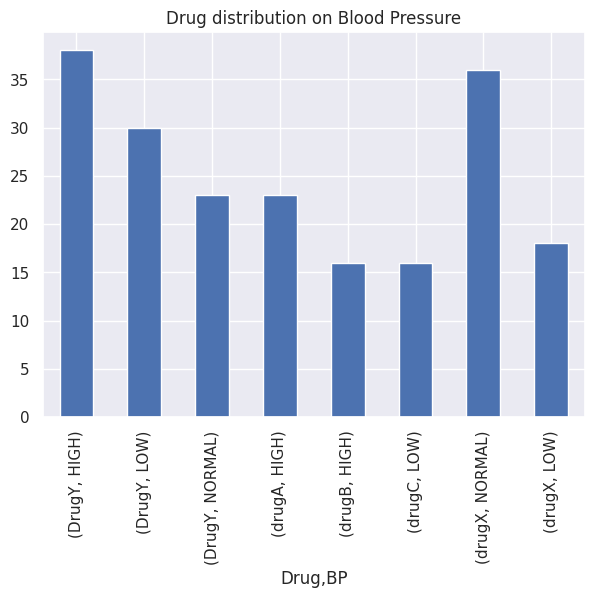

In [69]:
df.groupby(['Drug'])['BP'].value_counts().plot(kind="bar",figsize=(7,5))
plt.title('Drug distribution on Blood Pressure')
plt.plot()

[]

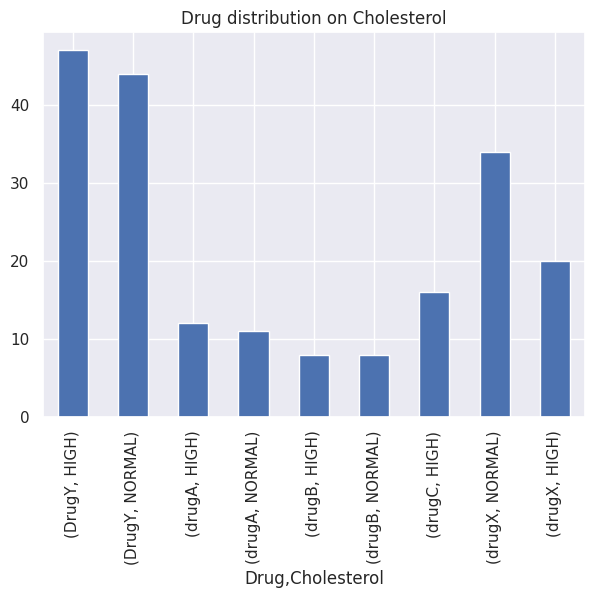

In [68]:
df.groupby(['Drug'])['Cholesterol'].value_counts().plot(kind="bar",figsize=(7,5))
plt.title('Drug distribution on Cholesterol')
plt.plot()

[]

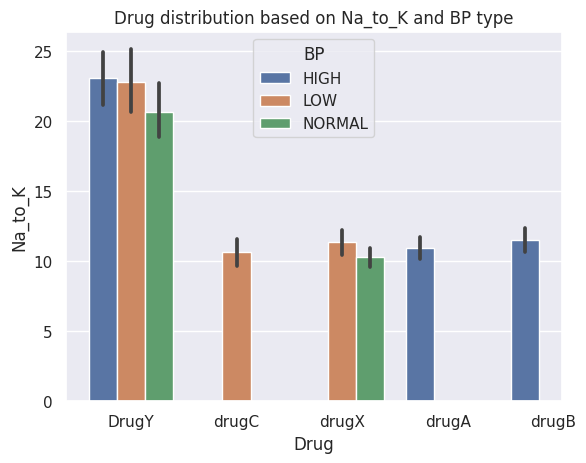

In [67]:
sns.barplot(x=df.Drug,y=df.Na_to_K,hue=df['BP'])
plt.title('Drug distribution based on Na_to_K and BP type')
plt.plot()

[]

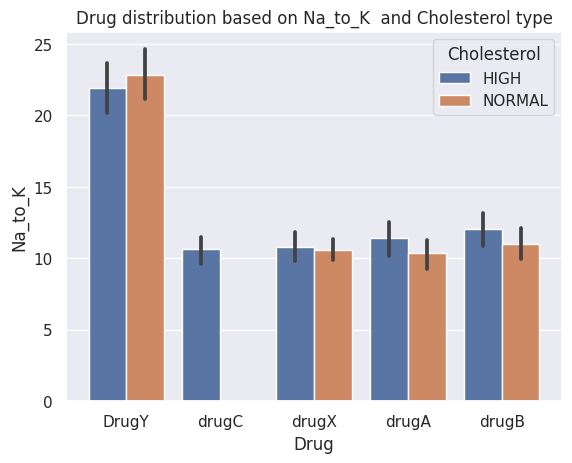

In [53]:
sns.barplot(x=df.Drug,y=df.Na_to_K,hue=df['Cholesterol'])
plt.title('Drug distribution based on Na_to_K  and Cholesterol type')
plt.plot()

[]

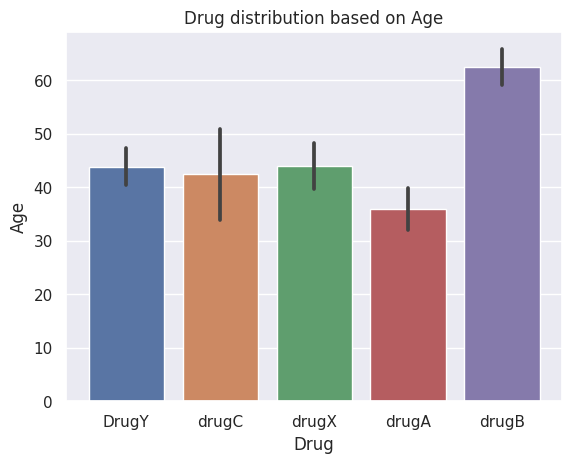

In [55]:
sns.barplot(x=df.Drug,y=df.Age)
plt.title('Drug distribution based on Age')
plt.plot()

Text(0.5, 1.0, 'Efeect of Na to K ratio and Gender on Drug')

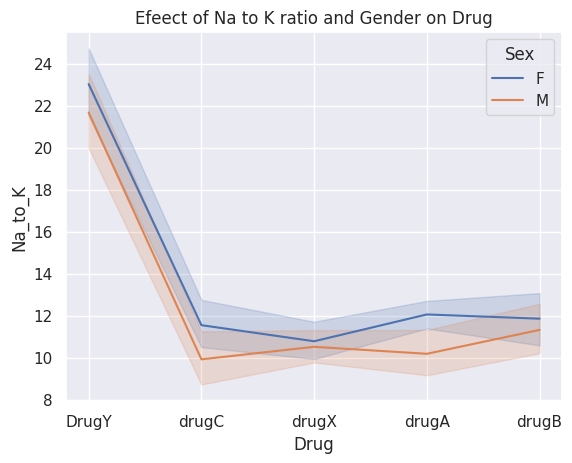

In [59]:
sns.lineplot(data=df,x='Drug',y='Na_to_K', hue='Sex')
plt.title('Effect of Na to K ratio and Gender on Drug')


Text(0.5, 1.0, 'Effect of Na to K ratio and Age on Drug')

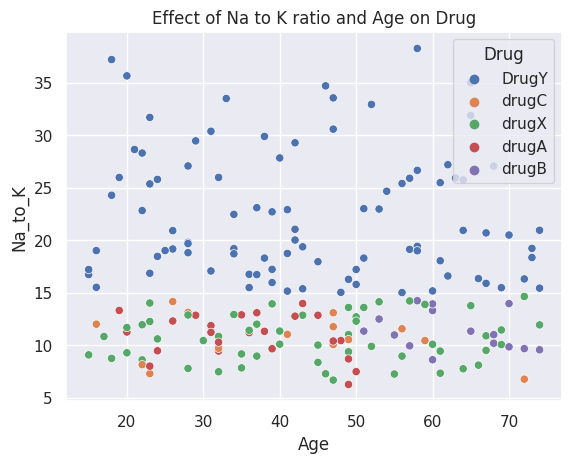

In [62]:
sns.scatterplot(data=df,x='Age',y='Na_to_K', hue='Drug')
plt.title('Effect of Na to K ratio and Age on Drug')


Text(0.5, 1.0, 'Effect of Na to K ratio and Blood Pressure on Drug')

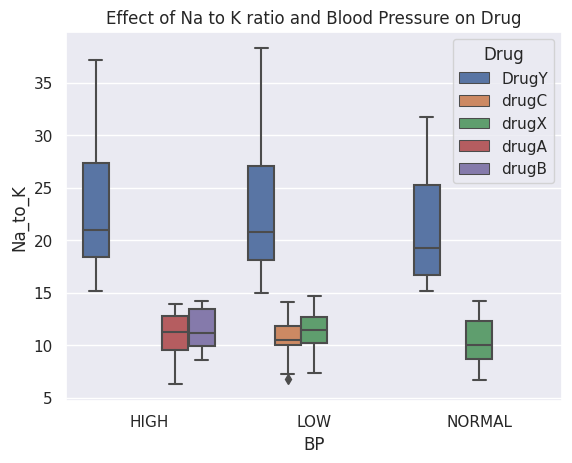

In [63]:
sns.boxplot(data=df,x='BP',y='Na_to_K', hue='Drug')
plt.title('Effect of Na to K ratio and Blood Pressure on Drug')

Text(0.5, 1.0, 'Effect of Na to K ratio and Cholesterol on Drug')

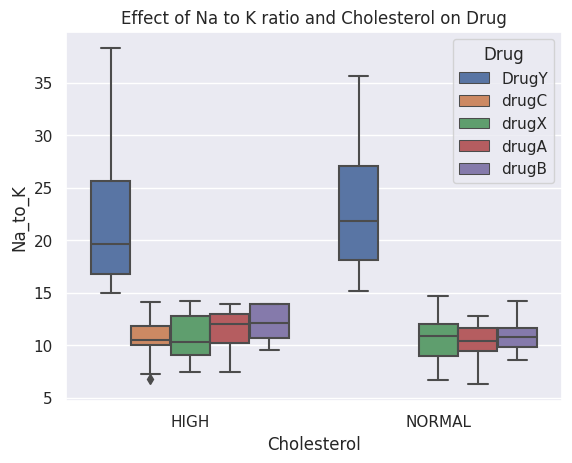

In [65]:
sns.boxplot(data=df,x='Cholesterol',y='Na_to_K', hue='Drug')
plt.title('Effect of Na to K ratio and Cholesterol on Drug')


### Model Building

In [70]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


#### One Hot Encoding


In [71]:
df['Sex']=pd.get_dummies(df['Sex'],drop_first=True)

In [72]:
mapping = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
df['BP'] = df['BP'].replace(mapping)
df['Cholesterol']=pd.get_dummies(df['Cholesterol'],drop_first=True)

In [73]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,0,25.355,DrugY
1,47,1,0,0,13.093,drugC
2,47,1,0,0,10.114,drugC
3,28,0,1,0,7.798,drugX
4,61,0,0,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,0,0,11.567,drugC
196,16,1,0,0,12.006,drugC
197,52,1,1,0,9.894,drugX
198,23,1,1,1,14.020,drugX


In [74]:
x=df.iloc[:,0:5]
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,2,0,25.355
1,47,1,0,0,13.093
2,47,1,0,0,10.114
3,28,0,1,0,7.798
4,61,0,0,0,18.043
...,...,...,...,...,...
195,56,0,0,0,11.567
196,16,1,0,0,12.006
197,52,1,1,0,9.894
198,23,1,1,1,14.020


In [75]:
y=df['Drug']
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

#### Train_Test_Split

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [77]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
131,52,1,0,1,32.922
96,58,0,0,0,38.247
181,59,0,1,0,13.884
19,32,0,2,1,25.974
153,72,0,0,1,14.642
...,...,...,...,...,...
67,17,1,1,1,10.832
192,72,1,0,0,16.310
117,40,0,1,0,10.103
47,68,1,0,0,10.291


In [78]:
x_test

,Age,Sex,BP,Cholesterol,Na_to_K
18,23,1,0,0,7.298
170,28,0,1,0,12.879
107,42,1,0,0,20.013
98,20,1,2,1,35.639
177,25,1,1,0,19.011
182,20,0,0,1,11.686
5,22,0,1,0,8.607
146,37,0,0,1,12.006
12,43,1,0,0,15.376
152,55,1,1,1,7.261


In [84]:
y_train.to_frame().value_counts()

Drug 
DrugY    61
drugX    36
drugA    18
drugB    13
drugC    12
dtype: int64

In [82]:
y_test.to_frame().value_counts()

Drug 
DrugY    30
drugX    18
drugA     5
drugC     4
drugB     3
dtype: int64

Target variables are imbalanced in test and train data so we need to balance

#### Balancing Data

In [85]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [86]:
x_train_s, y_train_s = smote.fit_resample(x_train, y_train)

In [87]:
x_train_s

,Age,Sex,BP,Cholesterol,Na_to_K
0,52,1,0,1,32.922000
1,58,0,0,0,38.247000
2,59,0,1,0,13.884000
3,32,0,2,1,25.974000
4,72,0,0,1,14.642000
...,...,...,...,...,...
300,17,1,1,0,10.051453
301,51,0,1,0,10.168361
302,37,0,1,1,9.120410
303,68,0,1,0,9.822476


In [88]:
y_train_s

0      DrugY
1      DrugY
2      drugX
3      DrugY
4      drugX
       ...  
300    drugX
301    drugX
302    drugX
303    drugX
304    drugX
Name: Drug, Length: 305, dtype: object

In [89]:
y_train_s.to_frame().value_counts()

Drug 
DrugY    61
drugA    61
drugB    61
drugC    61
drugX    61
dtype: int64

Now distribution of 'drug' feature is balanced

#### Scaling Data Using StandardScaler

In [90]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_s)
x_train=pd.DataFrame(x_train_scaled,columns=x_train_s.columns)

In [91]:
x_test_scaled=scaler.transform(x_test)
x_test=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [92]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
0,0.251961,1.100066,-1.268048,1.431782,3.644597
1,0.643046,-0.909036,-1.268048,-0.698430,4.629561
2,0.708226,-0.909036,-0.156684,-0.698430,0.123146
3,-1.051654,-0.909036,0.954680,1.431782,2.359429
4,1.555576,-0.909036,-1.268048,1.431782,0.263353
...,...,...,...,...,...
300,-2.029366,1.100066,-0.156684,-0.698430,-0.585758
301,0.186780,-0.909036,-0.156684,-0.698430,-0.564134
302,-0.725750,-0.909036,-0.156684,1.431782,-0.757973
303,1.294853,-0.909036,-0.156684,-0.698430,-0.628112


In [93]:
x_test

,Age,Sex,BP,Cholesterol,Na_to_K
0,-1.638281,1.100066,-1.268048,-0.698430,-1.095063
1,-1.312377,-0.909036,-0.156684,-0.698430,-0.062748
2,-0.399847,1.100066,-1.268048,-0.698430,1.256825
3,-1.833824,1.100066,0.954680,1.431782,4.147160
4,-1.507920,1.100066,-0.156684,-0.698430,1.071485
5,-1.833824,-0.909036,-1.268048,1.431782,-0.283417
6,-1.703462,-0.909036,-0.156684,-0.698430,-0.852938
7,-0.725750,-0.909036,-1.268048,1.431782,-0.224226
8,-0.334666,1.100066,-1.268048,-0.698430,0.399121
9,0.447503,1.100066,-0.156684,1.431782,-1.101907


#### Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression()
logi.fit(x_train,y_train_s)

LogisticRegression()

In [106]:
y_pred=logi.predict(x_train)
y_pred

array(['DrugY', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugB',
       'DrugY', 'drugX', 'drugX', 'drugX', 'DrugY', 'drugA', 'drugA',
       'drugA', 'DrugY', 'DrugY', 'drugX', 'drugX', 'DrugY', 'drugA',
       'drugA', 'drugB', 'drugC', 'drugB', 'DrugY', 'drugC', 'DrugY',
       'drugB', 'drugX', 'drugX', 'drugC', 'DrugY', 'DrugY', 'drugC',
       'DrugY', 'drugB', 'drugB', 'DrugY', 'drugX', 'drugC', 'drugA',
       'DrugY', 'DrugY', 'drugC', 'drugA', 'drugX', 'drugB', 'DrugY',
       'drugB', 'DrugY', 'DrugY', 'DrugY', 'drugB', 'DrugY', 'drugB',
       'drugC', 'drugB', 'drugX', 'DrugY', 'drugA', 'drugA', 'DrugY',
       'DrugY', 'drugA', 'drugA', 'drugX', 'drugX', 'DrugY', 'drugX',
       'DrugY', 'DrugY', 'drugC', 'DrugY', 'drugC', 'drugX', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugC', 'drugX', 'DrugY',
       'DrugY', 'drugC', 'DrugY', 'drugX', 'DrugY', 'drugX', 'drugX',
       'DrugY', 'drugA', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'Dru

In [107]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_train_s,y_pred)
accuracy

0.9639344262295082

In [108]:
from sklearn.metrics import classification_report
report = classification_report(y_train_s, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       DrugY       0.96      0.90      0.93        61
       drugA       0.95      1.00      0.98        61
       drugB       0.97      0.98      0.98        61
       drugC       0.94      1.00      0.97        61
       drugX       1.00      0.93      0.97        61

    accuracy                           0.96       305
   macro avg       0.96      0.96      0.96       305
weighted avg       0.96      0.96      0.96       305



In [101]:
y_pred_=logi.predict(x_test)

In [109]:
y_pred_

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'drugC', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [110]:
accuracy_logi=accuracy_score(y_test,y_pred_)
accuracy_logi

0.9666666666666667

In [111]:
report = classification_report(y_test, y_pred_)
print("Classification Report")
print(report)

Classification Report
              precision    recall  f1-score   support

       DrugY       1.00      0.93      0.97        30
       drugA       1.00      1.00      1.00         5
       drugB       0.75      1.00      0.86         3
       drugC       0.80      1.00      0.89         4
       drugX       1.00      1.00      1.00        18

    accuracy                           0.97        60
   macro avg       0.91      0.99      0.94        60
weighted avg       0.97      0.97      0.97        60



#### Random Forest  Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train_s)

RandomForestClassifier(random_state=42)

In [121]:
y_pred_rf=rf.predict(x_train)
y_pred_rf

array(['DrugY', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugB',
       'DrugY', 'drugX', 'drugX', 'drugX', 'DrugY', 'drugA', 'drugA',
       'drugA', 'DrugY', 'DrugY', 'drugX', 'drugX', 'DrugY', 'drugA',
       'drugA', 'drugB', 'drugC', 'drugB', 'DrugY', 'drugC', 'DrugY',
       'drugB', 'drugX', 'drugX', 'drugC', 'DrugY', 'DrugY', 'drugC',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugC', 'drugA',
       'DrugY', 'DrugY', 'DrugY', 'drugA', 'drugX', 'drugB', 'drugX',
       'drugB', 'DrugY', 'DrugY', 'DrugY', 'drugB', 'DrugY', 'drugB',
       'DrugY', 'drugB', 'drugX', 'DrugY', 'DrugY', 'drugA', 'DrugY',
       'DrugY', 'drugA', 'drugA', 'drugX', 'drugX', 'DrugY', 'drugX',
       'DrugY', 'DrugY', 'drugC', 'DrugY', 'drugC', 'drugX', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugC', 'drugX', 'DrugY',
       'DrugY', 'drugC', 'DrugY', 'drugX', 'DrugY', 'drugX', 'drugX',
       'DrugY', 'drugA', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'Dru

In [127]:
accuracy=accuracy_score(y_pred_rf,y_train_s)
print(f"accuracy {accuracy}")


accuracy 1.0


In [123]:
pred_rf=rf.predict(x_test)
pred_rf

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

In [124]:
accuracy_rf=accuracy_score(pred_rf,y_test)
print(f"accuracy {accuracy_rf}")


accuracy 1.0


In [125]:
report2 = classification_report(y_test, pred_rf)
print("Classification Report")
print(report2)

Classification Report
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



#### Label Encoding Target Variable

In [128]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y_train=lb.fit_transform(y_train_s)
y_test=lb.fit_transform(y_test)

In [129]:
y_train

array([0, 0, 4, 0, 4, 0, 2, 0, 4, 4, 4, 0, 1, 1, 1, 0, 0, 4, 4, 0, 1, 1,
       2, 3, 2, 0, 3, 0, 2, 4, 4, 3, 0, 0, 3, 0, 0, 0, 0, 4, 3, 1, 0, 0,
       0, 1, 4, 2, 4, 2, 0, 0, 0, 2, 0, 2, 0, 2, 4, 0, 0, 1, 0, 0, 1, 1,
       4, 4, 0, 4, 0, 0, 3, 0, 3, 4, 1, 0, 4, 0, 0, 3, 4, 0, 0, 3, 0, 4,
       0, 4, 4, 0, 1, 4, 0, 0, 0, 0, 4, 0, 4, 2, 2, 0, 4, 1, 4, 2, 1, 1,
       0, 0, 3, 4, 0, 4, 3, 4, 0, 0, 0, 4, 0, 1, 0, 4, 4, 1, 0, 2, 0, 1,
       0, 0, 4, 4, 0, 4, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [130]:
y_test

array([3, 4, 0, 0, 0, 4, 4, 4, 0, 4, 1, 0, 0, 0, 2, 3, 0, 0, 4, 0, 0, 4,
       4, 4, 0, 0, 0, 0, 0, 4, 4, 3, 1, 4, 0, 0, 4, 0, 1, 4, 0, 1, 0, 4,
       0, 4, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 4, 4, 0, 2])

In [132]:
joblib.dump(rf, 'final_Model.pkl')

['final_Model.pkl']

In [133]:
joblib.dump(scaler, 'final_Scaler.pkl')

['final_Scaler.pkl']

In [134]:
model = joblib.load('final_Model.pkl')

In [135]:
Scaler = joblib.load('final_Scaler.pkl')

In [145]:
p1 = np.array([[47,1,0,0,13]])

In [146]:
p2 = np.array([[23,0,2,0,25]])

In [147]:
sc = Scaler.transform(p1)

In [148]:
sc1 = Scaler.transform(p2)

In [149]:
model.predict(sc)

array(['drugC'], dtype=object)

In [150]:
model.predict(sc1)

array(['DrugY'], dtype=object)